In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.loaders import load_data_partition
import pandas as pd

In [2]:
data_partition = 'freesound_features_random_split.data'

In [3]:
data = load_data_partition(data_partition)

In [4]:
data.get_features_names()

Index(['average_loudness', 'barkbands_crest_dmean', 'barkbands_crest_dmean2',
       'barkbands_crest_dvar', 'barkbands_crest_dvar2', 'barkbands_crest_max',
       'barkbands_crest_mean', 'barkbands_crest_median', 'barkbands_crest_min',
       'barkbands_crest_stdev',
       ...
       'zerocrossingrate_dmean', 'zerocrossingrate_dmean2',
       'zerocrossingrate_dvar', 'zerocrossingrate_dvar2',
       'zerocrossingrate_max', 'zerocrossingrate_mean',
       'zerocrossingrate_median', 'zerocrossingrate_min',
       'zerocrossingrate_stdev', 'zerocrossingrate_var'],
      dtype='object', length=2646)

In [5]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

# LightGBM

In [6]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669146
[LightGBM] [Info] Number of data points in the train set: 6396, number of used features: 2642
[LightGBM] [Info] Start training from score -1.570494
[LightGBM] [Info] Start training from score -1.489642
[LightGBM] [Info] Start training from score -1.473135
[LightGBM] [Info] Start training from score -1.617444
[LightGBM] [Info] Start training from score -1.973331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

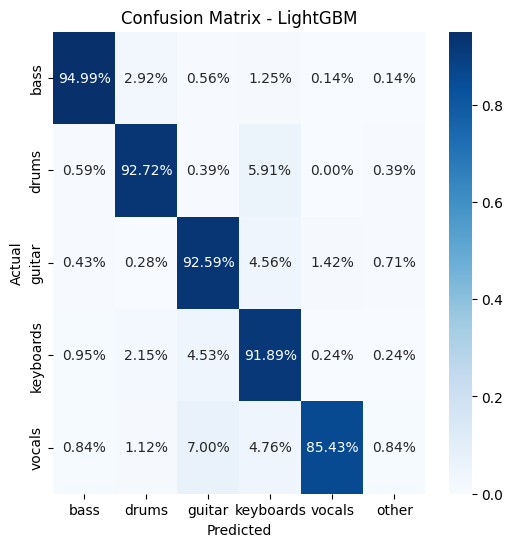

In [7]:
plot_confusion_matrix(y_test, X_test, lgbm)

In [8]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.98      0.95      0.97       718
       drums       0.93      0.93      0.93       508
      guitar       0.93      0.93      0.93       702
   keyboards       0.81      0.92      0.86       419
      vocals       0.96      0.85      0.91       357

   micro avg       0.93      0.92      0.92      2704
   macro avg       0.92      0.92      0.92      2704
weighted avg       0.93      0.92      0.92      2704



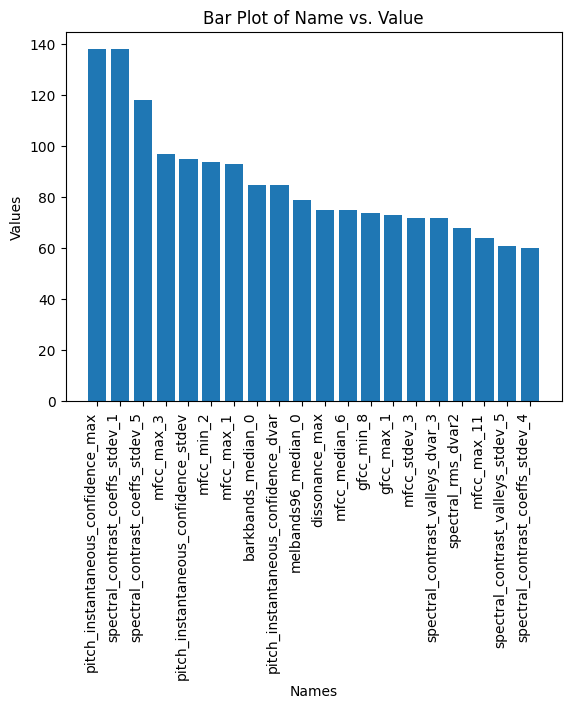

In [9]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [10]:
lgbm.save_model('../models/', 'lgbm_fe_rs_271023')